In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


Função .info() serve para descrever o dataframe e seus dados.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

Começaremos a analisar as rendas e valores dos jogadores, por isso criarei um novo DataFrame com apenas colunas que provavelmente iremos utilizar.

In [5]:
df=df[['Name','Age','Wage','Value','Overall','Potential']]
df.head()

,Name,Age,Wage,Value,Overall,Potential
0,L. Messi,31,€565K,€110.5M,94,94
1,Cristiano Ronaldo,33,€405K,€77M,94,94
2,Neymar Jr,26,€290K,€118.5M,92,93
3,De Gea,27,€260K,€72M,91,93
4,K. De Bruyne,27,€355K,€102M,91,92


In [6]:
def convert(x):
    a=x.replace('€','')
    if 'K' in a:
        a=float(a.replace('K',''))*1000
    elif 'M' in a:
        a=float(a.replace('M',''))*1000000
    return(float(a))

In [7]:
df['Value']=df['Value'].apply(lambda x: convert(x))
df['Wage']=df['Wage'].apply(lambda x: convert(x))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 6 columns):
Name         18207 non-null object
Age          18207 non-null int64
Wage         18207 non-null float64
Value        18207 non-null float64
Overall      18207 non-null int64
Potential    18207 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 853.5+ KB


In [11]:
df.head()

,Name,Age,Wage,Value,Overall,Potential
0,L. Messi,31,565000.0,110500000.0,94,94
1,Cristiano Ronaldo,33,405000.0,77000000.0,94,94
2,Neymar Jr,26,290000.0,118500000.0,92,93
3,De Gea,27,260000.0,72000000.0,91,93
4,K. De Bruyne,27,355000.0,102000000.0,91,92


In [12]:
df.tail()

,Name,Age,Wage,Value,Overall,Potential
18202,J. Lundstram,19,1000.0,60000.0,47,65
18203,N. Christoffersson,19,1000.0,60000.0,47,63
18204,B. Worman,16,1000.0,60000.0,47,67
18205,D. Walker-Rice,17,1000.0,60000.0,47,66
18206,G. Nugent,16,1000.0,60000.0,46,66


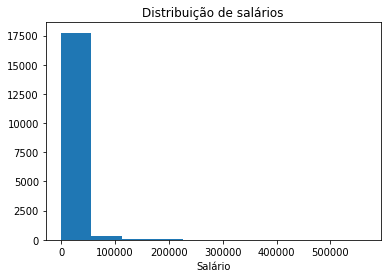

In [30]:
plt.hist(df['Wage']);
plt.title('Distribuição de salários');
plt.xlabel('Salário');

In [16]:
max(df['Wage'])

565000.0

In [90]:
q92, top=df['Wage'].quantile([0.92,1])
df_rich=df.query('{q92}<Wage<={top}'.format(q92=q92,top=top))

In [91]:
low,q92=df['Wage'].quantile([0,0.92])
df_poor=df.query('{low}<Wage<={q92}'.format(low=low,q92=q92))
df_poor.head()

,Name,Age,Wage,Value,Overall,Potential
76,Iniesta,34,21000.0,21500000.0,86,86
94,Y. Brahimi,28,28000.0,39000000.0,85,85
109,Z. Ibrahimović,36,15000.0,14000000.0,85,85
112,Alex Telles,25,22000.0,32000000.0,84,87
114,Bruno Fernandes,23,22000.0,40500000.0,84,88


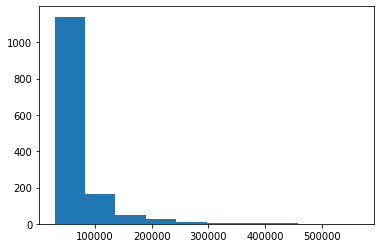

In [94]:
plt.hist(df_rich['Wage']);

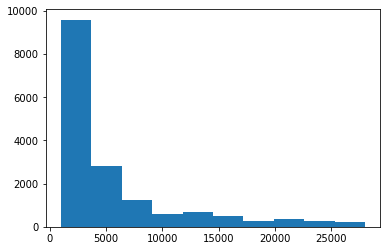

In [95]:
plt.hist(df_poor['Wage']);

In [93]:
print(len(df_rich));print(len(df_poor))

1404
16562


In [92]:
sum(df_rich['Wage'])>sum(df_poor['Wage'])

True